In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['housing.csv']


Index(['crime_rate', 'avg_number_of_rooms', 'distance_to_employment_centers',
       'property_tax_rate', 'pupil_teacher_ratio', 'house_value'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


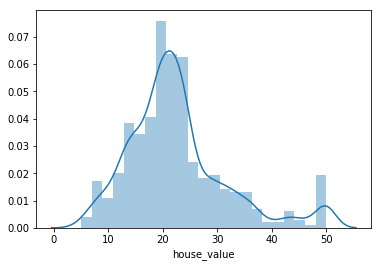

In [2]:
# EDA
# Housing price data contains 505x6
# The columns are:
# - crime rate
# - average number of rooms
# - distance to employment center
# - property tax rate
# - pupil teacher ratio
# - house price/value

#bring in the six packs
data = pd.read_csv('../input/housing.csv')
print(data.columns)

#descriptive statistics summary
data['house_value'].describe()

import seaborn as sns
#histogram
sns.distplot(data['house_value']);

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


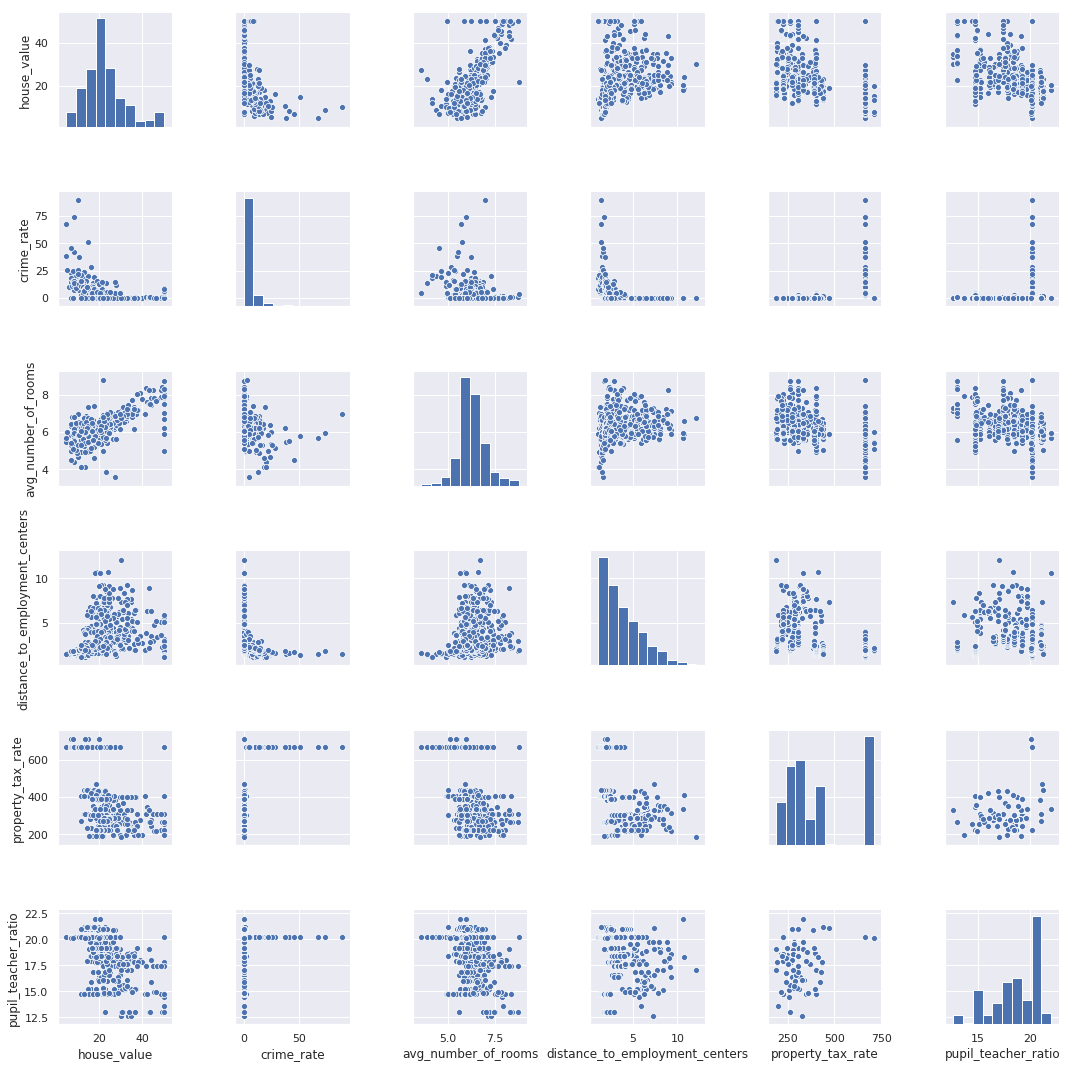

In [3]:
import matplotlib.pyplot as plt
#scatterplot
sns.set()
cols = ['house_value', 'crime_rate', 'avg_number_of_rooms', 'distance_to_employment_centers', 'property_tax_rate', 'pupil_teacher_ratio']
sns.pairplot(data[cols], size = 2.5)
plt.show();

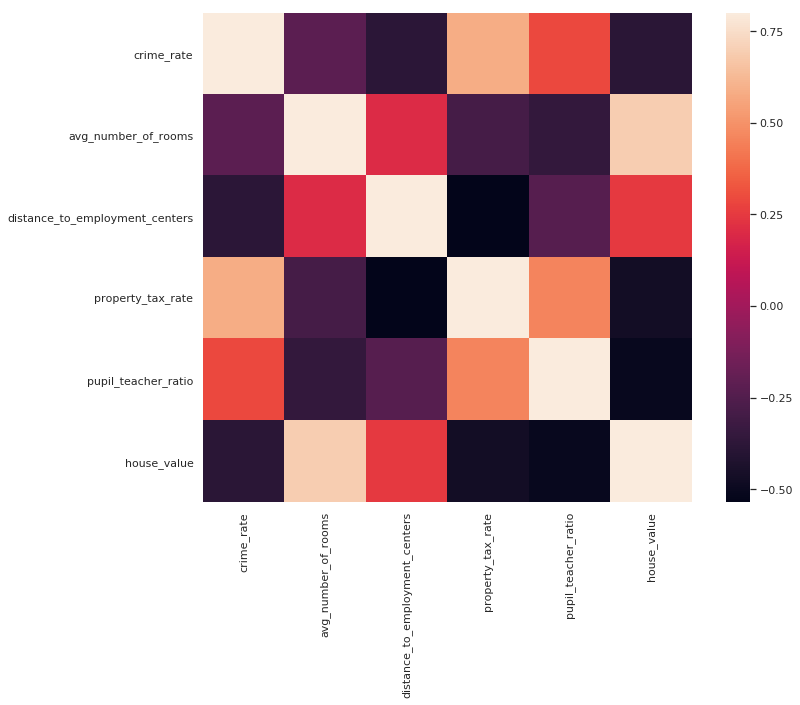

In [4]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# Visualizing the heatmap says, housing price is strongly correlated with the number of rooms, and negatively with crime rate, property tax rate and pupil teacher relationship!!!

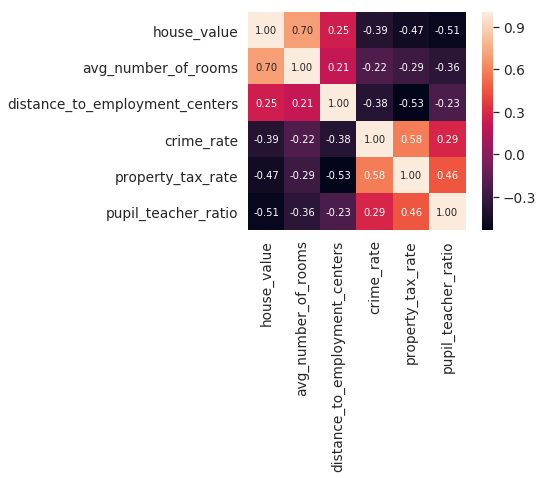

In [5]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'house_value')['house_value'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
data.corr().sort_values(ascending=False, by = 'house_value').house_value

house_value                       1.000000
avg_number_of_rooms               0.695365
distance_to_employment_centers    0.249896
crime_rate                       -0.388249
property_tax_rate                -0.468543
pupil_teacher_ratio              -0.508411
Name: house_value, dtype: float64

In [7]:
## Data Cleaning needed?
# We will need to replace all the null values.
data.isna().sum() 

crime_rate                        0
avg_number_of_rooms               0
distance_to_employment_centers    0
property_tax_rate                 0
pupil_teacher_ratio               0
house_value                       0
dtype: int64

In [8]:
# Data scaling works?
from sklearn import preprocessing
convert = preprocessing.StandardScaler() 

# separate input and output variables
feature = data.drop(['house_value'], axis=1)
label = data.house_value


# preprocess the data
featureT = convert.fit_transform(feature.values)
labelT = convert.fit_transform(data.house_value.values.reshape(-1,1)).flatten() 













In [9]:
featureT

array([[-0.41783001,  0.19493376,  0.55689727, -0.98810692, -0.30632705],
       [-0.41783233,  1.2824812 ,  0.55689727, -0.98810692, -0.30632705],
       [-0.41724164,  1.01628831,  1.07696947, -1.10682739,  0.11026674],
       ...,
       [-0.41394049,  0.9849715 , -0.77265634, -0.8040902 ,  1.17489532],
       [-0.40826261,  0.72589606, -0.66751162, -0.8040902 ,  1.17489532],
       [-0.41549281, -0.36165138, -0.61237475, -0.8040902 ,  1.17489532]])

In [10]:
labelT

array([-0.10111057,  1.32328678,  1.18193437,  1.48638572,  0.67089105,
        0.04024184,  0.49691885, -0.65564695, -0.39468865, -0.81874588,
       -0.39468865, -0.09023731, -0.23158972, -0.47080149, -0.28595603,
        0.06198836, -0.54691433, -0.25333625, -0.47080149, -0.97097155,
       -0.31857582, -0.79699936, -0.87311219, -0.75350631, -0.93835177,
       -0.64477369, -0.84049241, -0.44905497, -0.16635015, -1.06883091,
       -0.87311219, -1.0144646 , -1.02533787, -0.98184482, -0.39468865,
       -0.27508277, -0.16635015,  0.23596056,  0.89922955,  1.34503331,
        0.44255254,  0.30120013,  0.23596056, -0.14460362, -0.35119561,
       -0.27508277, -0.64477369, -0.88398546, -0.34032234, -0.30770256,
       -0.22071646,  0.26858034,  0.09460815, -0.39468865,  1.39939962,
        0.23596056,  0.98621565,  0.08373489, -0.31857582, -0.41643518,
       -0.71001326, -0.035871  ,  0.26858034,  1.13844132,  0.10548141,
       -0.34032234, -0.05761752, -0.55778759, -0.17722341,  0.18

In [11]:
# separate train and test data
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=19)

In [12]:
# train the model with linear regression
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
r2_score(linear_reg.predict(feature_train),label_train)

0.3749548429988564

In [13]:
# using 10-fold cross validation
from sklearn.model_selection import cross_val_score

cv10_scores = cross_val_score(linear_reg, feature_train,label_train, cv=10)
reg_score = r2_score(linear_reg.predict(feature_test),label_test) 
print(cv10_scores.mean())
print(reg_score)



0.5552361093359772
0.07433555055904806


In [14]:
# the coefficient values 
pd.DataFrame(linear_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient')

,Coefficient
avg_number_of_rooms,0.517080
distance_to_employment_centers,-0.019501
crime_rate,-0.119492
property_tax_rate,-0.180123
pupil_teacher_ratio,-0.214823


In [15]:
# train the model with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
seed = 7
forest_reg = RandomForestRegressor(random_state = seed)
# fit the train data
forest_reg.fit(feature_train,label_train)
# r2 score for training data
forest_train_r2_score = r2_score(forest_reg.predict(feature_train),label_train)
print(forest_train_r2_score)

# 10 fold cross validation
forest_cv10_score = cross_val_score(forest_reg, feature_train, label_train, cv=10)
print(forest_cv10_score.mean())


# let's see how well the random forest regressor fits well with the test data
forest_score = r2_score(forest_reg.predict(feature_test),label_test) 
print(forest_score)



















0.9451245852098487
0.6417226449520133
0.5602399430157509


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
# train the model with Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.0001)
# fit the train data
lasso_reg.fit(feature_train,label_train)
# r2 score for training data
lasso_train_r2_score = r2_score(lasso_reg.predict(feature_train),label_train)
print(lasso_train_r2_score)

# 10 fold cross validation
lasso_cv10_score = cross_val_score(lasso_reg, feature_train, label_train, cv=10)
print(lasso_cv10_score.mean())


# let's see how well the random forest regressor fits well with the test data
lasso_score = r2_score(lasso_reg.predict(feature_test),label_test) 
print(lasso_score)


0.3747420700456279
0.5552505236515535
0.07387077342854198
